In [1]:
import pandas as pd
import numpy as np

<b>Reading day data from the day.csv<b>

The csv file include following fields
- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [2]:
day=pd.read_csv("day.csv")

In [3]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
day.shape

(731, 16)

In [5]:
day.holiday.value_counts()

0    710
1     21
Name: holiday, dtype: int64

ploting different variables of data

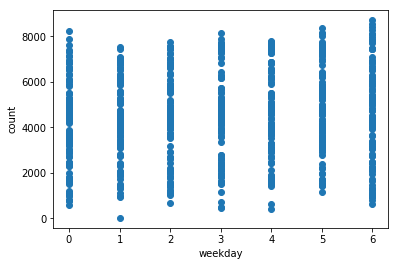

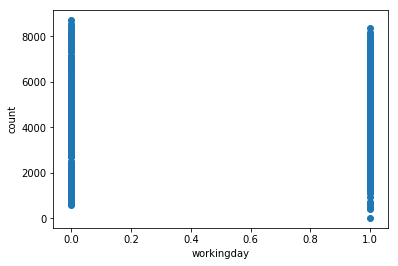

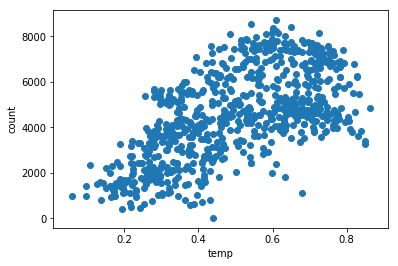

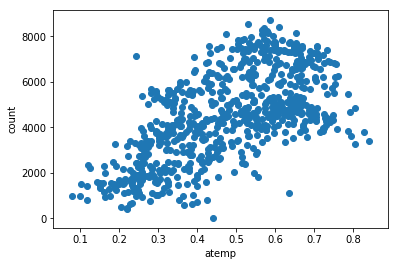

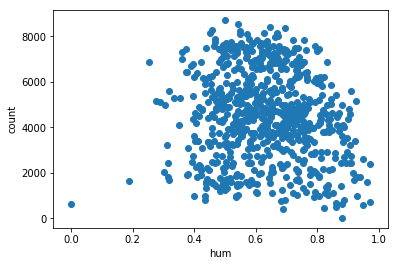

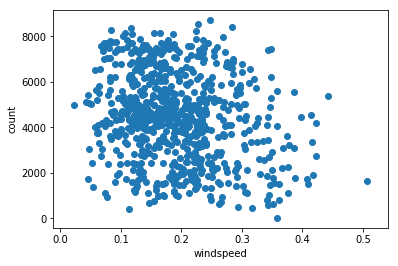

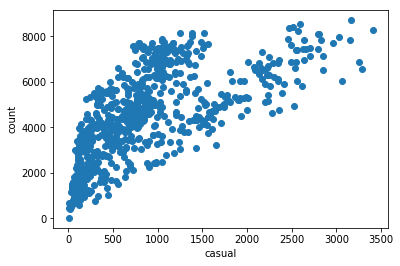

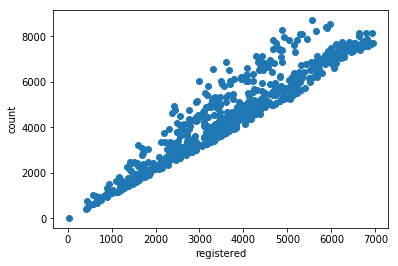

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
for i in ["weekday","workingday","temp","atemp","hum","windspeed","casual","registered"]:
    plt.scatter(day[i],day.cnt)
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()

<b>Applying Linear regression on day data<b>

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y =  train_test_split(day[['temp','atemp','hum','windspeed','casual','registered']],day['cnt'],test_size=0.33,random_state=42)
model=LinearRegression().fit(train_X,train_Y)
pred=model.predict(test_X)

In [8]:
from sklearn.metrics import mean_squared_error,r2_score
meansquare = mean_squared_error(test_Y,pred)
meansquare

2.1698438831103966e-24

In [10]:
r2=r2_score(test_Y,pred)
r2

1.0

Text(0,0.5,'Price')

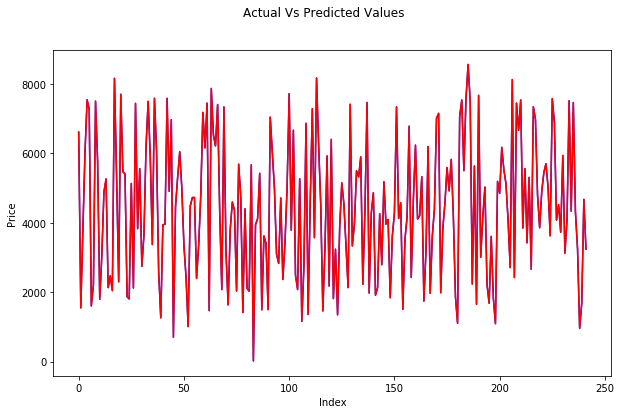

In [11]:
c=[i for i in range(0,test_Y.size)]
fig=plt.figure(figsize=(10,6))
plt.plot(c,test_Y, color="blue")
plt.plot(c,pred, color="red")
fig.suptitle('Actual Vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Price')